1. Installing the dependincies.

In [ ]:
!pip install flat

In [13]:
import bezmerizing
import random
from flat import document, shape, rgba
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [5]:
!pip install https://github.com/aparrish/bezmerizing/archive/master.zip

  Using cached https://github.com/aparrish/bezmerizing/archive/master.zip
  Created wheel for bezmerizing: filename=bezmerizing-0.1.0-py3-none-any.whl size=15814 sha256=3eba9c7bc6fb5a22c58f1466678903aa485098d6cce8770d370655e87f0994fe
  Stored in directory: /private/var/folders/jx/w26nlpj56491_9m44ty4md340000gn/T/pip-ephem-wheel-cache-tm0tepiv/wheels/74/5a/7d/4a62c2490b6c6061916e41ae070caaed12664893aef1a56d7c
Successfully built bezmerizing


In [14]:
from bezmerizing import Polyline
import numpy as np
from numpy.random import uniform, normal, choice

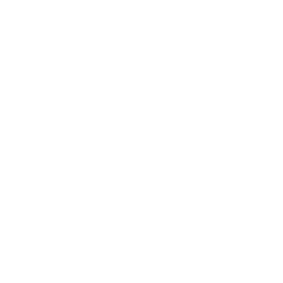

In [7]:
d = document(100, 100, 'mm') # create a document 100mm x 100mm (can replace 'mm' with 'pt')
page = d.addpage() # add a page
show(page) # show the page

In [15]:
def uniform_glyph_baseline(n=10):
    pts = [[-0.4, 0.5], [0.4, 0.5]]
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    rand_pline = Polyline(pts)
    return rand_pline

2. Trying out the examples with some modifications. In this example I modified the color of the glyphs, changed the number of edges possible and the canvas size.

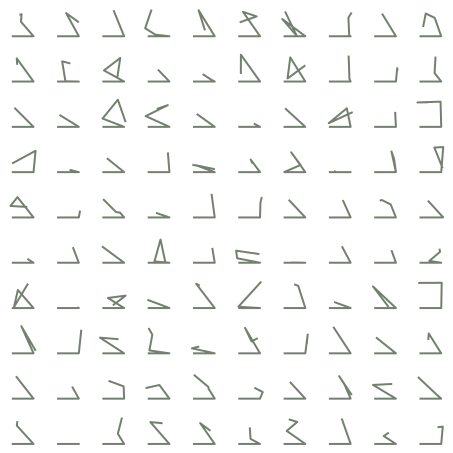

In [32]:
width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(77, 94, 73, 200)).width(2).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = uniform_glyph_baseline(random.randrange(1, 4))
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

3. Trying out interpolating curves example with some modifications.

In [34]:
pline = uniform_glyph_baseline().scale(40).translate(20, 20)
curve_path = pline.smooth_path()
curve_path

Path([moveto(x=36.0000, y=40.0000), curveto(x1=36.5388, y1=39.2869, x2=12.5418, y2=39.4676, x=7.2330, y=35.7216), moveto(x=7.2330, y=35.7216), curveto(x1=1.9242, y1=31.9755, x2=-0.5572, y2=20.8710, x=4.1474, y=17.5237), moveto(x=4.1474, y=17.5237), curveto(x1=8.8519, y1=14.1764, x2=32.5222, y2=16.8191, x=35.4604, y=15.6377), moveto(x=35.4604, y=15.6377), curveto(x1=38.3987, y1=14.4563, x2=25.9454, y2=8.5336, x=21.7768, y=10.4353), moveto(x=21.7768, y=10.4353), curveto(x1=17.6083, y1=12.3370, x2=11.5555, y2=27.7558, x=10.4494, y=27.0479), moveto(x=10.4494, y=27.0479), curveto(x1=9.3433, y1=26.3399, x2=12.7373, y2=6.5384, x=15.1402, y=6.1878), moveto(x=15.1402, y=6.1878), curveto(x1=17.5432, y1=5.8372, x2=22.5290, y2=24.1419, x=24.8668, y=24.9441), moveto(x=24.8668, y=24.9441), curveto(x1=27.2047, y1=25.7463, x2=28.1828, y2=8.8890, x=29.1674, y=11.0012), moveto(x=29.1674, y=11.0012), curveto(x1=30.1519, y1=13.1134, x2=33.6840, y2=34.2497, x=30.7743, y=37.6173)])

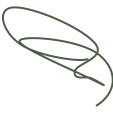

In [39]:
d = document(40, 40, 'mm')
page = d.addpage()
curve_figure = shape().stroke(rgba(77, 94, 73, 255)).width(2)
page.place(curve_figure.path(curve_path))
show(page)

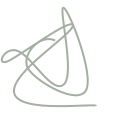

In [42]:
curve_path_aug = pline.augment().smooth_path()

pline = uniform_glyph_baseline().scale(35).translate(20, 20)
d = document(40, 40, 'mm')
page = d.addpage()
curve_figure = shape().stroke(rgba(77, 94, 73, 128)).width(2)
curve_path = pline.smooth_path(tightness=-0.5)
page.place(curve_figure.path(curve_path))
show(page)

3. Creating my own asemic writing

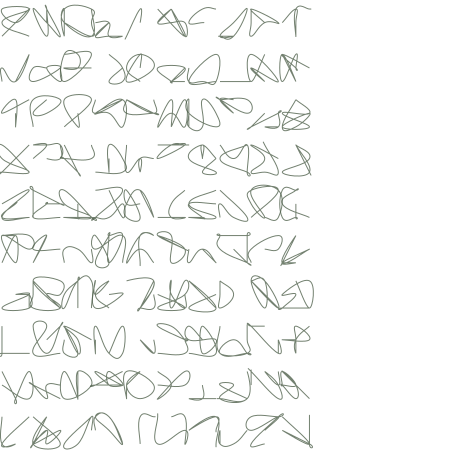

In [47]:
def grid_glyph():
    pts = []
    for i in range(int(t_normal(4, 12, 8, 2))):
        x = (choice([-0.5, 0, 0.5]))
        y = (choice([-0.5, 0, 0.5]))
        pts.append([x, y])
    return Polyline(pts)

width = 160
height = 160
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(77, 94, 73, 200)).width(1).join('round')
grid_size = 10
cell_size_x = width / grid_size - 5
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5)
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = grid_glyph()
        glyph = glyph.scale(scale_val).translate(x, y)
        glyph_curve = glyph.augment().smooth_path(tightness=-0.5)
        # note .path() here, not .polyline()!
        page.place(brush.path(glyph_curve))
show(page)

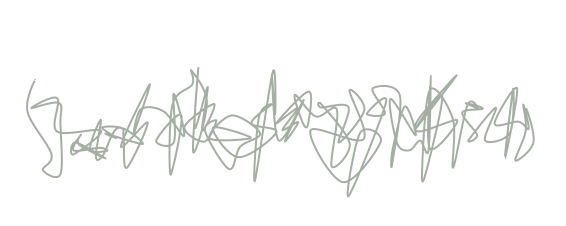

In [63]:
def make_scribble(width, height, steps, stddev=0):
    pts = []
    for i in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    return Polyline(pts)


size = 200
d = document(200, 80, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(77, 94, 73, 200)).width(1)
scribble_poly = make_scribble(width=180,
                    height=10,
                    steps=150,
                    stddev=5)
curve = curve_figure.path(scribble_poly.smooth_path().translate(10, 45))
page.place(curve)
show(page)

4. Make it look like written text with words — first attempts ;(

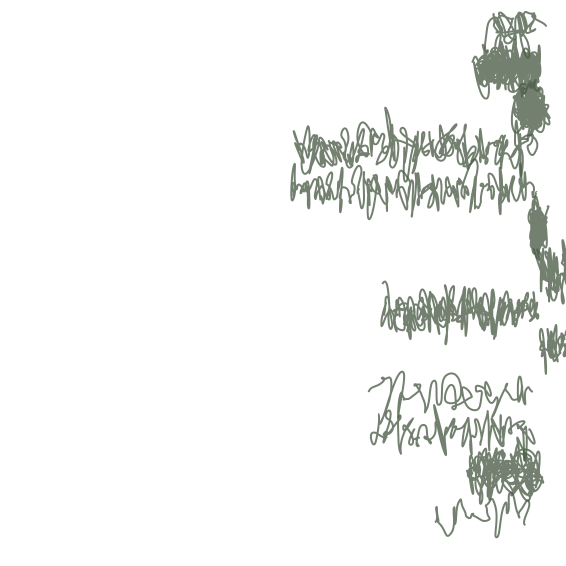

In [92]:
def make_scribble(width, height, steps, stddev=0, start_from=0):
    pts = []
    for i in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    return Polyline(pts)

size = 200
d = document(size, size, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(255, 255, 0, 255)).width(1)
curve_figure1 = shape().stroke(rgba(77, 94, 73, 200)).width(2)
curve_figure2 = shape().stroke(rgba(77, 94, 255, 200)).width(2)
row_n = 13
for i in range(row_n):
    break_line_at_width = random.randrange(int((size-20)/3), (size-20));
    width1 = break_line_at_width
    width2 = size - 20 - break_line_at_width - 30
    scribble_poly1 = make_scribble(
                        width=width1,
                        height=(size/row_n)*0.25,
                        steps=int(uniform(25, 50)),
                        stddev=uniform(2))
    scribble_poly2 = make_scribble(
                        width=width2,
                        height=(size/row_n)*0.25,
                        steps=int(uniform(25, 250)),
                        stddev=uniform(2),
                        start_from=width1+30)
    scribble_poly_tr1 = scribble_poly1.translate(
        10, 10 + (i*size/(row_n+1))) # row_n + 1 to leave some space at the bottom
    scribble_poly_tr2 = scribble_poly2.translate(
        10 + width1 + 30, 10 + (i*size/(row_n+1)))
    lines = line_figure.polyline(scribble_poly_tr)
    curve = curve_figure1.path(scribble_poly_tr1.smooth_path(tightness=-1.5))
    curve = curve_figure1.path(scribble_poly_tr2.smooth_path(tightness=-1.5))
    page.place(curve)
    #page.place(lines) # uncomment to see original lines
show(page)